In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import sklearn as sk 
from sklearn.datasets import make_blobs
from sklearn.metrics import accuracy_score

## 1) Création d'un dataset random

Utilisation de la bibliothèque sklearn et de la fonction make_blobs() pour un dataset random avec n individus (n_samples ) possèdant chacun 2 caractéristiques ( n_features ) et la population est séparée en deux catégories ( centers ) 

In [2]:
X,y = make_blobs(n_samples = 100, n_features = 2, centers = 2, random_state = 0)

In [3]:
X.shape # il y a bien 100 individus avec 2 caractéristiques (x1, x2)

(100, 2)

In [4]:
print(y.shape) # la dimension (100,) n'est pas très pratique il est préférable de la changer en (100,1)
y # y est un vecteur contenant des 1 et des 0 (1 = première catégorie, 0 = deuxieme ctégorie)

(100,)


array([1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1])

In [5]:
y = y.reshape(y.shape[0],1)
print(y.shape) #la dimension a bien été modifiée

(100, 1)


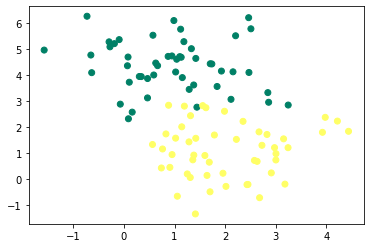

In [6]:
plt.scatter(X[:,0],X[:,1], c=y, cmap= 'summer') # nous pouvons tracer le scatter des différents individus. [:,0] prend la 1er colonne

## 2) Implémentation des différentes fonctions 

### Les fonctions sont : 
- Initialisation des w1, w2 et b sous forme de matrices ( W et b )  avec w1,w2 et b de manière aléatoire.
- Création du model avec les fonction z(X) et a(Z) sous la forme matrices (Z , A).
- Création de la fonction loss log ou fonction coût qui renvoie un nombre (erreurs).
- Création de la fonction gradient qui renvoie le gradient W et le gradient de b par rapport à log loss.
- Création de la fonction qui modifie les gradients au fur et à mesure en prenant en compte un pas d'apprentissage alpha.

In [7]:
def init(X):
    """ Cette fonction initialise w1,w2 sous forme de vecteur W"""
    W = np.random.randn(X.shape[1],1) # le vecteur W doit etre de dimmension : (nb_colonne X, 1) pour être * correctement 
    b = np.random.randn(1) # b est un nombre
    return (W,b)

In [8]:
def model(X,W,b):
    """ Cette fonction renvoie A la matrice de proba (sigmoide) de a(Z) avec Z = z(X,W)"""
    Z = X.dot(W)+b
    A = 1 / (1 + np.exp(-Z)) # a(Z) correspond a la fonction sigmoide qui renvoie donc une probabilité [0,1]
    return A

In [9]:
def log_loss(A,y):
    """ Cette fonction correspond à la fonction coût de notre model elle renvoie donc un nombre permettra par la suite
    de tracer la courbe des erreurs """
    L = ( -1/len(y) ) * np.sum(y * np.log(A) + (1-y) * np.log(1 - A))
    return L 

In [10]:
def gradient(X,A,y):
    """ return les différents gradients"""
    dw = 1 / len(y) * np.dot(X.T , A-y) # un matrice jacobienne correspondant à W
    db = 1 / len(y) * np.sum(A-y) # juste un nombre 
    return (dw,db)

In [11]:
def update(W,b,dw,db,pas):
    W = W - pas * dw
    b = b - pas * db
    return (W,b)

In [12]:
def neurone(X, y, pas, niter):
    W,b = init(X)
    loss = []
    for i in range(niter):
        A = model(X,W,b)
        loss.append(log_loss(A,y))
        dw,db = gradient(X,A,y)
        W,b = update(W,b,dw,db,pas)

    plt.plot(loss)
    return W,b

In [13]:
def predict(X, W, b):
    A = model(X, W, b )
    return A >= 0.5

## 3) Nous pouvons à présent tout rassembler

In [14]:
def final_model_predict(X, y, new_donnee, pas, niter):
    W,b = init(X)
    loss = []
    
    for etape in range(niter):
        A = model(X,W,b)
        loss.append(log_loss(A,y))
        dw,db = gradient(X,A,y)
        W,b = update(W,b,dw,db,pas)
    
    y_predict = predict(X, W, b)
    accuracy = accuracy_score(y,y_predict) 
    
    
    model_new_donnee = model(new_donnee, W, b) # new_donnee est un vecteur (n,1) selon le nombre de new_donnée
    
    x0 = np.linspace(-1,4,len(y))
    x1 = (-W[0] * x0 - b)/W[1]
    
    plt.plot(loss)
    plt.show()
    
    plt.scatter(X[:,0],X[:,1], c=y, cmap= 'summer')
    plt.scatter(new_donnee[0],new_donnee[1] , color = 'red') # affiche les nouvelles données
    plt.plot(x0,x1, c = "orange", lw=3  )
    plt.show()
    
    print("le model est précis à : " + str(accuracy*100) + " %")
    
    if model_new_donnee >= 0.5:
        print("cette donnée est notée 1")
        print("cette estimation est précise à : " + str(model_new_donnee*100) + "%")
    else:
        print("cette donnée est notée 0")
        print("cette estimation est précise à : " + str((1 - model_new_donnee)*100) + " %")

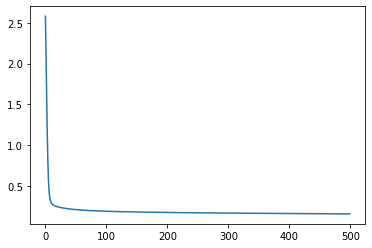

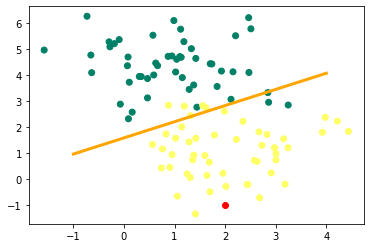

le model est précis à : 92.0 %
cette donnée est notée 1
cette estimation est précise à : [99.881137]%


In [15]:
final_model_predict(X,y,np.array([2,-1]),0.1,500)

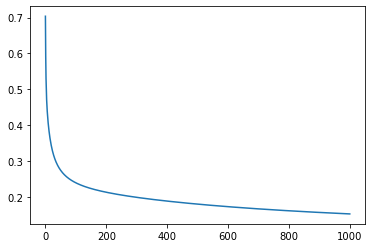

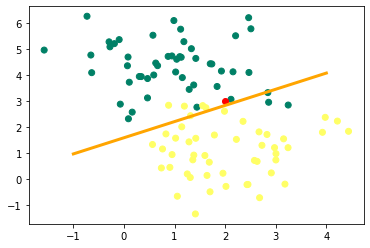

le model est précis à : 92.0 %
cette donnée est notée 0
cette estimation est précise à : [57.45069763] %


In [16]:
final_model_predict(X,y,np.array([2,3]),0.1,1000)

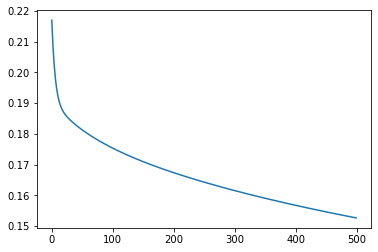

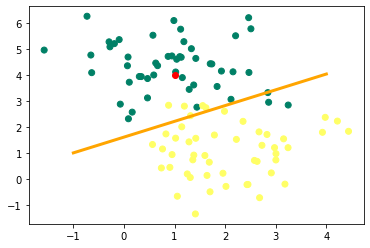

le model est précis à : 92.0 %
cette donnée est notée 0
cette estimation est précise à : [96.07436901] %


In [17]:
final_model_predict(X,y,np.array([1,4]),0.1,500)